In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from highlight_text import fig_text
from scipy import stats
import random
import seaborn as sns

In [64]:
df1 = pd.read_csv('betisA.csv')
df1['y'] = 80-.8*df1['y']
df1['x'] = 1.2*df1['x']
df1 = df1.fillna(0)
df1['playerId'] = df1['playerId'].astype(int) 
df1 = df1[df1['teamId']==65].reset_index()
df1 = df1[(df1['type/value']==1)]
players = df1['playerId'].unique()
starters = players[0:12]
starters.sort()
starters = list(starters)
del starters[1]

In [65]:
players

array([ 1,  4,  5,  7,  8,  9, 11, 12, 15, 18, 21, 28, 16, 10, 17, 23])

In [66]:
starters

[1, 5, 7, 8, 9, 11, 12, 15, 18, 21, 28]

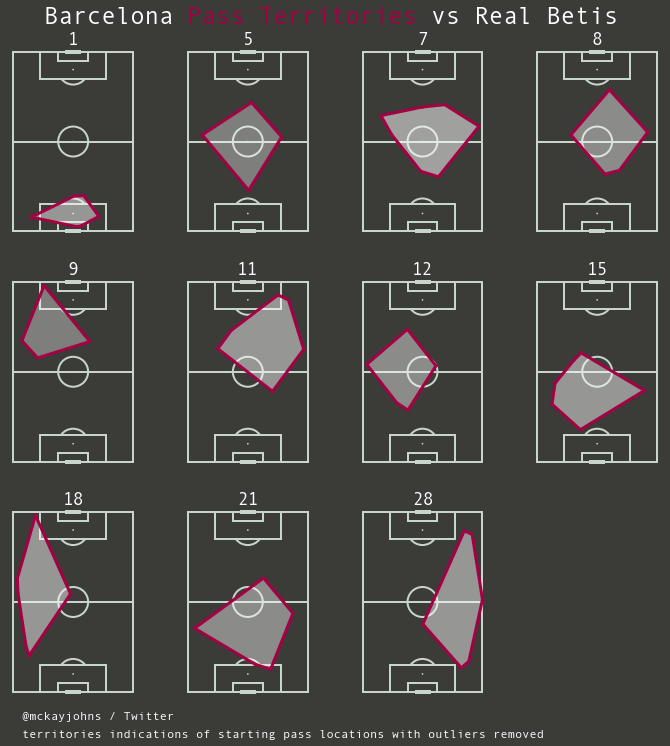

In [70]:
fig, axes = plt.subplots(3,4,figsize=(12,12))
fig.set_facecolor('#3b3b38')
axes.flat[-1].set_visible(False)


pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)



for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor('#3b3b38')
        pitch.draw(ax=ax)

        df = df1[(df1.playerId == starters[i])]
        df = df[(np.abs(stats.zscore(df[['x','y']])) < .5)]

        points = df[['y','x']].values
        hull = ConvexHull(df[['x','y']])

        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], '#A50044',lw=3)
            ax.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.1)
            ax.set_ylabel(ylabel=' ')


        ax.set_title(label=starters[i],c='white',va='center',ha='center',fontsize=18,fontfamily='Andale Mono')
    except:
        pass


s = f'Barcelona <Pass Territories> vs Real Betis'
fig_text(s=s,
        x=.175,y=.9,
        fontfamily='Andale Mono',
        highlight_weights=['bold'],
        fontsize=24,
        color='white',
        highlight_colors=['#A50044'],
        zorder=1
       )

fig.text(.15,.1,'@mckayjohns / Twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='w')
fig.text(.15,.08,'territories indications of starting pass locations with outliers removed',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='w')
fig.savefig('convexgrid.png',facecolor='#3b3b38',dpi=500,bbox_inches='tight')